# TRACFLOW Data

In [1]:
suppressMessages(library(lubridate))
suppressWarnings(suppressMessages(library(tidyverse)))

select = dplyr::select

## Parsing and reshaping

In [2]:
tt = read_csv("../../data/travel_times/concatenated_405_travel_times_5am_to_8pm_5_min.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Time = col_character()
)
See spec(...) for full column specifications.


In [ ]:
vol = read_csv("../../../data/concatenated_405_volumes_5am_to_8pm.csv")
sp = read_csv("../../../data/concatenated_405_speeds_5am_to_8pm.csv")

In [3]:
nrow(tt)

[1] 46980

In [4]:
tt$Time = mdy_hm(tt$Time)

In [5]:
tt_long = tt %>%
    rename(date_time = Time) %>%
    gather(trip, travel_time, -date_time) %>%
    separate(trip, c("lane", "entry", "exit"), convert=T) %>%
    spread(lane, travel_time) %>%
    mutate(GP = GP/3600, HOT = HOV/3600,
           savings = GP - HOT, 
           trip_id = sprintf("%02i_%02i", entry, exit),
           tod = 100*hour(date_time) + minute(date_time),
           wday = wday(date_time))

In [103]:
object.size(tt)/1e6
object.size(tt_long)/1e6
nrow(tt_long)
head(tt_long, 10)

75.7 bytes

338.3 bytes

[1] 4698000

date_time,entry,exit,GP,HOV,HOT,savings,trip_id,tod,wday
<dttm>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2018-01-01 05:00:00,3,3,0.03383333,121.8,0.03383333,0,03_03,500,2
2018-01-01 05:00:00,3,5,0.09350000,336.6,0.09350000,0,03_05,500,2
2018-01-01 05:00:00,3,6,0.13716667,493.8,0.13716667,0,03_06,500,2
2018-01-01 05:00:00,3,7,0.11450000,412.2,0.11450000,0,03_07,500,2
2018-01-01 05:00:00,3,9,0.19283333,694.2,0.19283333,0,03_09,500,2
2018-01-01 05:00:00,3,10,0.23933333,861.6,0.23933333,0,03_10,500,2
2018-01-01 05:00:00,3,11,0.24883333,895.8,0.24883333,0,03_11,500,2
2018-01-01 05:00:00,3,12,0.25633333,922.8,0.25633333,0,03_12,500,2
2018-01-01 05:00:00,4,4,0.02850000,102.6,0.02850000,0,04_04,500,2


In [7]:
mutate(tt_long, date_time=as.numeric(date_time)) %>%
select(date_time, tod, trip_id, entry, exit, GP, HOT, savings) %>%
write_csv("../../../data/travel_times.csv", col_names=F)

In [27]:
sp_long = sp %>%
    rename(date_time = Time) %>%
    gather(trip, speed, -date_time) %>%
    separate(trip, c("lane", "entry"), convert=T) %>%
    spread(lane, speed) %>%
    mutate(tod = 100*hour(date_time) + minute(date_time))

In [28]:
object.size(sp)/1e6
object.size(sp_long)/1e6
head(sp_long, 10)

80.8 bytes

177.6 bytes

date_time,entry,GP,HOV,tod
<dttm>,<int>,<dbl>,<dbl>,<dbl>
2018-01-01 05:00:00,3,60,60,500
2018-01-01 05:00:00,4,60,60,500
2018-01-01 05:00:00,5,60,60,500
2018-01-01 05:00:00,6,60,60,500
2018-01-01 05:00:00,7,60,60,500
2018-01-01 05:00:00,8,60,60,500
2018-01-01 05:00:00,9,60,60,500
2018-01-01 05:00:00,10,60,60,500
2018-01-01 05:00:00,11,60,60,500


In [32]:
vol_long = vol %>%
    rename(date_time = Time) %>%
    gather(trip, volume, -date_time) %>%
    separate(trip, c("lane", "entry"), convert=T) %>%
    spread(lane, volume) %>%
    mutate(tod = 100*hour(date_time) + minute(date_time))

In [33]:
nrow(vol_long)
head(vol_long)

[1] 4932900

date_time,entry,GP,HOV,tod
<dttm>,<int>,<dbl>,<dbl>,<dbl>
2018-01-01 05:00:00,3,8.310345,0.000000,500
2018-01-01 05:00:00,4,10.791045,0.000000,500
2018-01-01 05:00:00,5,21.326531,8.285714,500
2018-01-01 05:00:00,6,4.588235,0.000000,500
2018-01-01 05:00:00,7,7.156863,0.000000,500
2018-01-01 05:00:00,8,3.325581,0.000000,500


In [38]:
sp_vol = left_join(vol_long, sp_long, by=c("date_time", "tod", "entry"), suffix=c("_volume", "_speed")) %>%
    rename(HOT_volume = HOV_volume, HOT_speed = HOV_speed)

In [47]:
head(sp_vol)

date_time,entry,GP_volume,HOT_volume,tod,GP_speed,HOT_speed
<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-01 05:00:00,3,8.310345,0.000000,500,60,60
2018-01-01 05:00:00,4,10.791045,0.000000,500,60,60
2018-01-01 05:00:00,5,21.326531,8.285714,500,60,60
2018-01-01 05:00:00,6,4.588235,0.000000,500,60,60
2018-01-01 05:00:00,7,7.156863,0.000000,500,60,60
2018-01-01 05:00:00,8,3.325581,0.000000,500,60,60


In [51]:
select(sp_vol, date_time, tod, entry, GP_volume, HOT_volume, GP_speed, HOT_speed) %>%
mutate(date_time = as.numeric(date_time)) %>%
write_csv("../../../data/sp_vol_long.csv", col_names=F)

## Reliability

In [18]:
reliability_savings = tt_long %>%
    filter(GP >= 0, HOT >= 0) %>%
    group_by(tod, entry, exit, trip_id) %>%
    summarize(reliability_HOT = quantile(HOT, 0.8, na.rm=T) - median(HOT, na.rm=T),
              reliability_GP = quantile(GP, 0.8, na.rm=T) - median(GP, na.rm=T),
              reliability = reliability_GP - reliability_HOT)

In [16]:
head(reliability_savings)

tod,entry,exit,trip_id,reliability_HOT,reliability_GP,reliability
<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
500,3,3,03_03,0,0,0
500,3,5,03_05,0,0,0
500,3,6,03_06,0,0,0
500,3,7,03_07,0,0,0
500,3,9,03_09,0,0,0
500,3,10,03_10,0,0,0


In [19]:
summary(tt_long$HOT)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-24.00000   0.04367   0.10317  -0.67612   0.16561   0.83108 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.007338 0.023200 0.031981 0.178200 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.006047 0.000000 0.134144 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.055108  0.000000  0.006125  0.017153  0.025017  0.144508 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


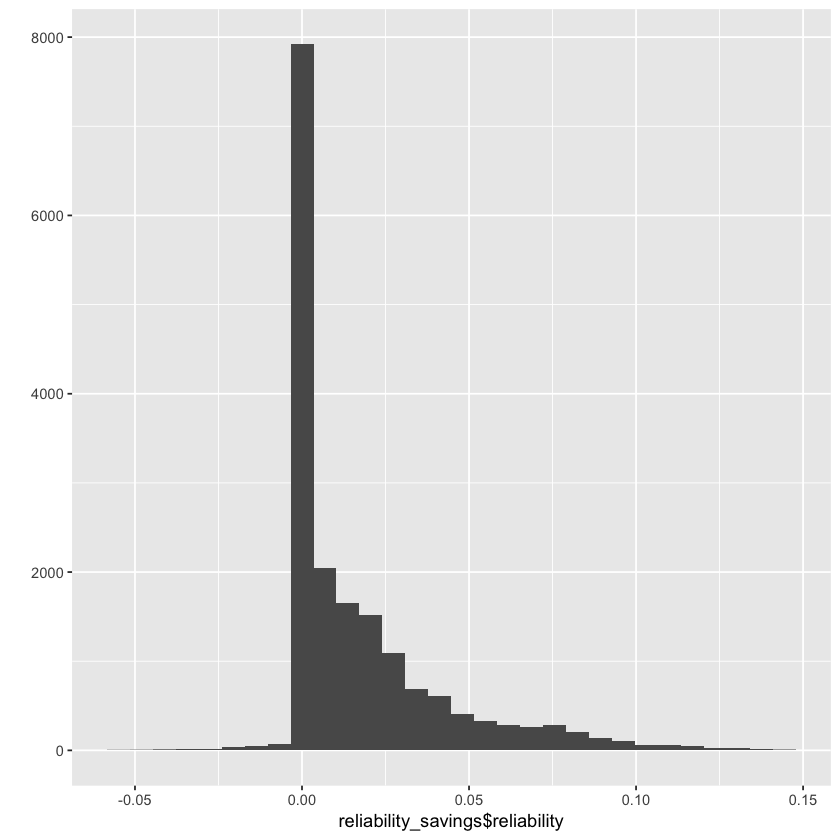

In [21]:
summary(reliability_savings$reliability_GP)
summary(reliability_savings$reliability_HOT)
summary(reliability_savings$reliability)
qplot(reliability_savings$reliability)

In [22]:
write_csv(select(reliability_savings, tod, entry, exit, trip_id, reliability),
          "../../data/savings/expected_reliability_savings.csv")